![](./resources/System_v1_cropland.png)

This notebook contains a short demo on how to use the WorldCereal system to generate a temporary crop extent map for your area and season of interest.
The map is generated using a default model trained by the WorldCereal consortium to distinguish temporary crops from all other land use.

Please note that for the purpose of this demo, the processing area is currently limited to 250 km² per model run.

### Content
  
- [Before you start](###-Before-you-start)
- [1. Define your region of interest](#1.-Define-your-region-of-interest)
- [2. Define your year of interest](#2.-Define-your-year-of-interest)
- [3. Set some other options](#3.-Set-some-other-options)
- [4. Generate your map](#2.-Generate-your-map)

### Before you start

In order to run this notebook, you need to create an account on the Copernicus Data Space Ecosystem,
by completing the form [HERE](https://identity.dataspace.copernicus.eu/auth/realms/CDSE/login-actions/registration?client_id=cdse-public&tab_id=eRKGqDvoYI0).

In [1]:
# TEMPORARY CELL

import sys
sys.path.append('/home/jeroendegerickx/git/worldcereal/worldcereal-classification/notebooks')
%load_ext autoreload
%autoreload 2

### 1. Define your region of interest

When running the code snippet below, an interactive map will be visualized. Click the Rectangle button on the left hand side of the map to start drawing your region of interest. When finished, execute the second cell to store the coordinates of your region of interest.

In case your region exceeds the 250 km² limit, you will be asked to draw again.

In [2]:
from worldcereal.utils.map import ui_map

map = ui_map()
map.show_map()

Map(center=[51.1872, 5.1154], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

2024-10-10 14:26:31.019 | INFO     | worldcereal.utils.map:handle_draw:141 - Your processing extent: (4.515724, 50.982641, 4.609108, 51.020018)
2024-10-10 14:26:31.093 | INFO     | worldcereal.utils.map:handle_draw:148 - Area of processing extent: 28.52 km²


### 2. Define your year of interest

The default WorldCereal temporary crop model always uses a time series of exactly one year as input for the model.

However, instead of just using a calendar year (January 1st - December 31st), we recommend to define the exact start and end date of your time series, or processing period, based on the timing of the local growing seasons.

Take the following example for Western Europe, where we typically have a winter season (s1) and summer season (s2):

<div>
<img src="./resources/Cropland_inference_choose_end_date.png" width="500"/>
</div>


The best timing to start and end the time series in this case would be October (green vertical line), as for both seasons this would result in nicely capturing the growing season within the time series. It would not make sense in this case to define the year from June to June (red vertical line), as you will miss the start of the summer season and the end of the winter season in your time series.

So if you would like to map temporary crops in Western Europe for the year 2021, we would recommend to define your processing period as October 1st 2020 - September 30th 2021.

In case you do not know the typical seasonality of crops in your area of interest, you can consult the WorldCereal crop calendars using the function below.

Note that in case your area of interest is located in an extremely heterogeneous part of the world, the WorldCereal seasons cannot be retrieved at the moment. As a fall-back, please consult the [USDA crop calendars](https://ipad.fas.usda.gov/ogamaps/cropcalendar.aspx).

2024-10-10 14:26:45.056 | INFO     | worldcereal.utils.map:get_processing_extent:236 - Your processing extent: (4.515724, 50.982641, 4.609108, 51.020018)


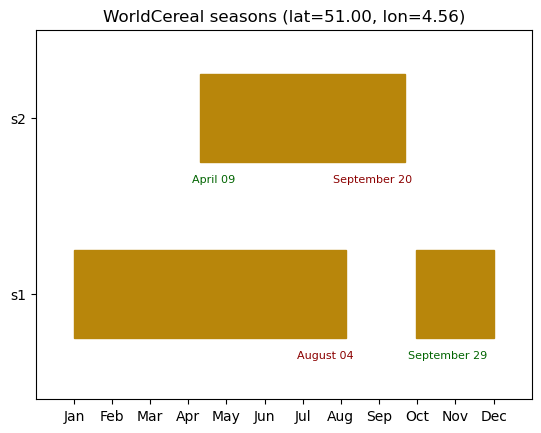

In [3]:
from utils import retrieve_worldcereal_seasons

spatial_extent = map.get_processing_extent()
seasons = retrieve_worldcereal_seasons(spatial_extent)

Execute the next cell to select your processing period:

In [4]:
from utils import date_slider

slider = date_slider()
slider.show_slider()

### 3. Set some other options

In [8]:
from worldcereal.job import PostprocessParameters
import os
from pathlib import Path

# Choose whether or not you want to spatially clean the classification results
postprocess_result = True

# Choose the postprocessing method you want to use ["smooth_probabilities", "majority_vote"]
postprocess_method = "smooth_probabilities"

postprocess_parameters = PostprocessParameters(enable=postprocess_result,
                                               method=postprocess_method)

# Specify the local directory where the resulting maps should be downloaded to.
output_dir = Path(os.getcwd()) / 'CROPLAND_test'
print(f"Output directory: {output_dir}")

Output directory: /home/jeroendegerickx/git/worldcereal/worldcereal-classification/CROPLAND_test_nopostprocess


### 4. Generate your map

In [9]:
from worldcereal.job import generate_map

processing_period = slider.get_processing_period()
processing_extent = map.get_processing_extent()

# Launch the job on CDSE through OpenEO
results = generate_map(
    processing_extent,
    processing_period,
    output_dir=output_dir,
    postprocess_parameters=postprocess_parameters,
)

2024-10-10 16:40:08.435 | INFO     | utils:get_processing_period:117 - Selected processing period: 2018-10-01 to 2019-09-30


2024-10-10 16:40:08.504 | INFO     | worldcereal.utils.map:get_processing_extent:236 - Your processing extent: (4.515724, 50.982641, 4.609108, 51.020018)
INFO:openeo.rest.connection:Found OIDC providers: ['CDSE']
INFO:openeo.rest.connection:No OIDC provider given, but only one available: 'CDSE'. Using that one.
INFO:openeo.rest.connection:Using default client_id 'sh-b1c3a958-52d4-40fe-a333-153595d1c71e' from OIDC provider 'CDSE' info.
INFO:openeo.rest.connection:Found refresh token: trying refresh token based authentication.
INFO:openeo.rest.auth.oidc:Doing 'refresh_token' token request 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token' with post data fields ['grant_type', 'client_id', 'refresh_token'] (client_id 'sh-b1c3a958-52d4-40fe-a333-153595d1c71e')
INFO:openeo.rest.connection:Obtained tokens: ['access_token', 'id_token', 'refresh_token']
INFO:openeo.rest.auth.config:Storing refresh token for issuer 'https://identity.dataspace.copernicus.eu/

Authenticated using refresh token.


2024-10-10 16:40:34,531 - openeo_gfmap.utils - INFO - Selected orbit state: ASCENDING. Reason: Orbit has more cumulative intersected area. 3.0794083284461435 > 2.9861386687313125
INFO:openeo_gfmap.utils:Selected orbit state: ASCENDING. Reason: Orbit has more cumulative intersected area. 3.0794083284461435 > 2.9861386687313125


0:00:00 Job 'j-2410101e92934a5da839ca7a10984c2b': send 'start'
0:00:14 Job 'j-2410101e92934a5da839ca7a10984c2b': created (progress 0%)
0:00:19 Job 'j-2410101e92934a5da839ca7a10984c2b': created (progress 0%)
0:00:25 Job 'j-2410101e92934a5da839ca7a10984c2b': created (progress 0%)
0:00:33 Job 'j-2410101e92934a5da839ca7a10984c2b': created (progress 0%)
0:00:43 Job 'j-2410101e92934a5da839ca7a10984c2b': running (progress N/A)
0:00:56 Job 'j-2410101e92934a5da839ca7a10984c2b': running (progress N/A)
0:01:11 Job 'j-2410101e92934a5da839ca7a10984c2b': running (progress N/A)
0:01:31 Job 'j-2410101e92934a5da839ca7a10984c2b': running (progress N/A)
0:01:55 Job 'j-2410101e92934a5da839ca7a10984c2b': running (progress N/A)
0:02:25 Job 'j-2410101e92934a5da839ca7a10984c2b': running (progress N/A)
0:03:02 Job 'j-2410101e92934a5da839ca7a10984c2b': running (progress N/A)
0:03:49 Job 'j-2410101e92934a5da839ca7a10984c2b': running (progress N/A)
0:04:47 Job 'j-2410101e92934a5da839ca7a10984c2b': running (progre

INFO:openeo.rest.job:Downloading Job result asset 'cropland_2020-01-01Z.tif' from https://openeo.creo.vito.be/openeo/jobs/j-2410101e92934a5da839ca7a10984c2b/results/assets/ZGNjYWI2ZDktODQ2Yy00OGE5LTlkOTQtNDk3MTQ2Y2IyMjg1/5ef2ad85691d9dd85a2280ff0cbbd4db/cropland_2020-01-01Z.tif?expires=1729176998 to /home/jeroendegerickx/git/worldcereal/worldcereal-classification/CROPLAND_test_nopostprocess/cropland_2020-01-01Z.tif


The classification results will be automatically downloaded to your output_dir in .tif format.
By default, OpenEO stores the class labels and confidence score in one file.

Using the function below, we split this information into separate .tif files, thereby adding metadata and a color map, to ease interpretation and visualization:
- "xxx_classification_start-date_end-date.tif" --> contains the classification labels. A class look-up table is included in the .tif metadata.
- "xxx_confidence_start-date_end-date.tif" -->  contains the probability associated to the prediction [0 - 100]

In [12]:
from utils import prepare_visualization

filepaths = prepare_visualization(results)
filepaths

INFO:rasterio._env:GDAL signalled an error: err_no=1, msg='TIFFSetField:/home/jeroendegerickx/git/worldcereal/worldcereal-classification/CROPLAND_test_nopostprocess/cropland_classification_20181001_20190930.tif: Cannot modify tag "PhotometricInterpretation" while writing'
INFO:rasterio._env:GDAL signalled an error: err_no=1, msg='TIFFSetField:/home/jeroendegerickx/git/worldcereal/worldcereal-classification/CROPLAND_test_nopostprocess/cropland_confidence_20181001_20190930.tif: Cannot modify tag "PhotometricInterpretation" while writing'


{'cropland': {'classification': PosixPath('/home/jeroendegerickx/git/worldcereal/worldcereal-classification/CROPLAND_test_nopostprocess/cropland_classification_20181001_20190930.tif'),
  'confidence': PosixPath('/home/jeroendegerickx/git/worldcereal/worldcereal-classification/CROPLAND_test_nopostprocess/cropland_confidence_20181001_20190930.tif')}}

The resulting raster files can be visualized in QGIS.

In [ ]:
# Add section where user can check the availability of cropland reference data!